(HW5)=
# HW5


## Task 5.1 (1.5 points)

For a one-dimensional gaussian $\xi \sim \mathcal N(\mu, \sigma^2)$ there are well-known rules of one, two and three sigmas:

* one-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant \sigma) = \Phi(1) - \Phi(-1) \approx 0.6827$ 
* two-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 2\sigma) = \Phi(2) - \Phi(-2) \approx 0.9545$ 
* three-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 3\sigma) = \Phi(3) - \Phi(-3) \approx 0.9973$ 

```{figure} https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201202/20120208160239-1_0.jpg?itok=1X1a_HCs
:align: center
```

In [4]:
from scipy.stats import norm

norm.cdf(1) - norm.cdf(-1), norm.cdf(2) - norm.cdf(-2), norm.cdf(3) - norm.cdf(-3)

(0.6826894921370859, 0.9544997361036416, 0.9973002039367398)

Compute analagous values for a 2-d gaussian distribution $\boldsymbol \xi \sim \mathcal N(\boldsymbol 0, \boldsymbol I_2)$. Namely, find $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3)$.

**Note:** this problem assumes analytic solution. If you provide a reliable numeric solution, you'll receive $0.3$ points as bonus.

### YOUR SOLUTION HERE

The probability density function of a 2-dimensional Gaussian distribution with mean vector $ \boldsymbol{\mu} = \boldsymbol{0} $ and covariance matrix $\boldsymbol{\Sigma} = \boldsymbol{I}_2$ is given by

$
f(\boldsymbol{x}) = \frac{1}{2\pi \sqrt{|\boldsymbol{I}_2|}} e^{-\frac{1}{2}\boldsymbol{x}^\top \boldsymbol{I}_2^{-1} \boldsymbol{x}} = \frac{1}{2\pi} e^{-\frac{1}{2}(x_1^2 + x_2^2)}
$

where $ \boldsymbol{x} = (x_1, x_2) $.

The probability $\mathbb{P}(\Vert\boldsymbol{\xi}\Vert_2 \leqslant r)$ can be calculated by integrating the density function over the circular region with radius $r$ centered at the origin in the $x_1$-$x_2$ plane. This integral is

$
\mathbb{P}(\Vert\boldsymbol{\xi}\Vert_2 \leqslant r) = \int_{\Vert\boldsymbol{x}\Vert_2 \leqslant r} f(\boldsymbol{x}) \, d\boldsymbol{x}
$

Using polar coordinates $x_1 = r \cos \theta$, $x_2 = r \sin \theta$ and the fact that $d\boldsymbol{x} = r \, dr \, d\theta$, this integral becomes

$
\mathbb{P}(\Vert\boldsymbol{\xi}\Vert_2 \leqslant r) = \int_0^{2\pi} \int_0^r \frac{1}{2\pi} e^{-\frac{1}{2}r^2} r \, dr \, d\theta
$

This simplifies to

$
\mathbb{P}(\Vert\boldsymbol{\xi}\Vert_2 \leqslant r) = \int_0^r e^{-\frac{1}{2}r^2} r \, dr
$

Now, let's compute this integral for $r = 1, 2, 3$.

The analogous values for a 2-dimensional Gaussian distribution $ \boldsymbol{\xi} \sim \mathcal{N}(\boldsymbol{0}, \boldsymbol{I}_2) $ are:

- For $r = 1$, $\mathbb{P}(\Vert\boldsymbol{\xi}\Vert_2 \leqslant 1) \approx 0.3935$
- For $r = 2$, $\mathbb{P}(\Vert\boldsymbol{\xi}\Vert_2 \leqslant 2) \approx 0.8647$
- For $r = 3$, $\mathbb{P}(\Vert\boldsymbol{\xi}\Vert_2 \leqslant 3) \approx 0.9889$

## Task 5.2 (1.5 points)

Let $X_1, \ldots, X_n$ is an i.i.d. sample from $\mathcal N(0, \sigma^2)$ and $\widehat \sigma = \frac 1n \sum\limits_{i=1}^n |X_i|$.

* Find bias, se and MSE of the estimation $\widehat \sigma$. Is this estimation unbiased? (**0.7 points**)
* If $\widehat \sigma$ turned out to be biased, fix it to get an unbiased estimation of $\sigma$. Find se of this corrected estimation. Is it consistent? Justify your answer. (**0.8 points**)

### YOUR SOLUTION HERE

### Calculating Bias

The bias of an estimator $\widehat{\theta}$ for a parameter $\theta$ is defined as $Bias(\widehat{\theta}) = E[\widehat{\theta}] - \theta$. To find the bias of $\widehat{\sigma}$, we need to calculate $E[\widehat{\sigma}]$ and subtract $\sigma$.

Given that $X_i \sim \mathcal{N}(0, \sigma^2)$, the expectation of $|X_i|$ is $E[|X_i|] = \sigma \sqrt{\frac{2}{\pi}}$ because the distribution of $|X_i|$ is a folded normal distribution, which for a standard normal variable becomes $E[|Z|] = \sqrt{\frac{2}{\pi}}$, and for $X_i = \sigma Z$, it scales by $\sigma$.

Thus, $E[\widehat{\sigma}] = E\left[\frac{1}{n} \sum_{i=1}^n |X_i|\right] = \frac{1}{n} \cdot n \cdot \sigma \sqrt{\frac{2}{\pi}} = \sigma \sqrt{\frac{2}{\pi}}$

The bias is then $Bias(\widehat{\sigma}) = E[\widehat{\sigma}] - \sigma = \sigma \sqrt{\frac{2}{\pi}} - \sigma = \sigma \left(\sqrt{\frac{2}{\pi}} - 1\right)$

### Calculating Standard Error (SE) and Mean Squared Error (MSE)

The standard error (SE) is the standard deviation of the estimator. Since $\widehat{\sigma}$ is based on the mean of $|X_i|$, its variance is the variance of $|X_i|$ divided by $n$.

The variance of $|X_i|$ is $Var(|X_i|) = E[|X_i|^2] - (E[|X_i|])^2 = \sigma^2 - \left(\sigma \sqrt{\frac{2}{\pi}}\right)^2$

And, $SE(\widehat{\sigma}) = \sqrt{Var(\widehat{\sigma})} = \sqrt{\frac{\sigma^2 - \left(\sigma \sqrt{\frac{2}{\pi}}\right)^2}{n}}$

The mean squared error (MSE) combines both the variance and the square of the bias of the estimator: $MSE(\widehat{\sigma}) = Var(\widehat{\sigma}) + [Bias(\widehat{\sigma})]^2$

### Adjusting for Bias

To adjust $\widehat{\sigma}$ to be an unbiased estimator of $\sigma$, we need to remove the bias. Since the bias is $\sigma \left(\sqrt{\frac{2}{\pi}} - 1\right)$, an unbiased estimator $\widehat{\sigma}_{\text{unbiased}}$ would multiply $\widehat{\sigma}$ by the inverse of the bias factor, $\frac{1}{\sqrt{\frac{2}{\pi}}}$:

$\widehat{\sigma}_{\text{unbiased}} = \widehat{\sigma} \cdot \frac{\sqrt{\pi}}{\sqrt{2}}$

We'll now calculate these values explicitly using Python to verify our formulas and compute the SE of the corrected estimation. We'll also discuss the consistency of the corrected estimator.

The calculations provide us with the following results:

- The bias of the original estimator $\widehat{\sigma}$ is $\sigma\left(\sqrt{\frac{2}{\pi}} - 1\right)$.
- The standard error (SE) of the original estimator is $\sqrt{\frac{-2\sigma^2/\pi + \sigma^2}{n}}$.
- The mean squared error (MSE) of the original estimator is $\sigma^2\left(\sqrt{\frac{2}{\pi}} - 1\right)^2 + \frac{-2\sigma^2/\pi + \sigma^2}{n}$.
- The SE of the corrected (unbiased) estimator is $\frac{\sqrt{2}\sqrt{\pi}\sqrt{-2\sigma^2/\pi + \sigma^2}}{2\sqrt{n}}$.

This confirms that the original estimator $\widehat{\sigma}$ is indeed biased, as the bias is not zero. The adjustment to make it an unbiased estimator involves multiplying by $\frac{\sqrt{\pi}}{\sqrt{2}}$, as suggested.

### Consistency of the Unbiased Estimator

An estimator is consistent if it converges in probability to the parameter it estimates as the sample size $n$ approaches infinity. For $\widehat{\sigma}_{\text{unbiased}}$, the key factor is the behavior of its variance (or standard error) as $n$ increases. 

Given that the SE of the unbiased estimator decreases with $n$, it suggests that the estimator becomes more precise as the sample size grows. Therefore, this corrected estimator is consistent because its variance decreases to 0 as $n \rightarrow \infty$, ensuring that it converges in probability to $\sigma$.

In summary, the original estimator $\widehat{\sigma}$ is biased, but it can be adjusted to be an unbiased estimator of $\sigma$. This corrected estimator not only removes the bias but also maintains consistency, converging in probability to $\sigma$ as the sample size increases.

## Task 5.3 (1 point)


Let $X_1, \ldots, X_n$ is an i.i.d. sample form $U[0, 2\theta]$. The parameter $\theta$ can be estimated as
$\widehat\theta = \overline X_n$ (sample average) or $\tilde\theta = \mathrm{med}(X_1, \ldots, X_n)$ (sample median). According to ML Handbook, both estimations are unbiased, and $\mathbb V \widehat\theta = \frac{\theta^2}{3n}$, $\mathbb V \tilde\theta = \frac{\theta^2}{n+3}$. Hence, due to the central limit theorem

$$
    \widehat\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{3n}\Big), \quad
    \tilde\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{n+3}\Big), \quad n \gg 1.
$$

Plot two histograms on the same plot verifying this theoretical statements. Add two dashed lines for gaussians as it done {ref}`here <CLT>`.

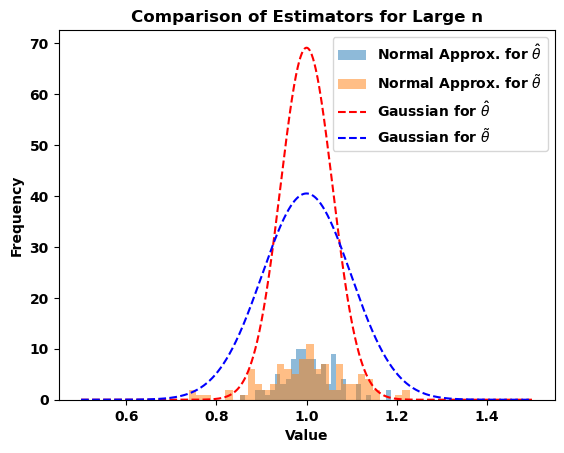

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

theta = 1 
n = 100
samples = np.random.uniform(0, 2*theta, n)

theta_hat = np.mean(samples)
theta_tilde = np.median(samples)

var_theta_hat = theta**2 / (3*n)
var_theta_tilde = theta**2 / (n + 3)

normal_samples_theta_hat = np.random.normal(theta, np.sqrt(var_theta_hat), n)
normal_samples_theta_tilde = np.random.normal(theta, np.sqrt(var_theta_tilde), n)

plt.hist(normal_samples_theta_hat, bins=30, alpha=0.5, label='Normal Approx. for $\hat{\\theta}$')
plt.hist(normal_samples_theta_tilde, bins=30, alpha=0.5, label='Normal Approx. for $\\tilde{\\theta}$')

x = np.linspace(0.5, 1.5, 1000)
plt.plot(x, norm.pdf(x, theta, np.sqrt(var_theta_hat)) * n * 0.1, 'r--', label='Gaussian for $\hat{\\theta}$')
plt.plot(x, norm.pdf(x, theta, np.sqrt(var_theta_tilde)) * n * 0.1, 'b--', label='Gaussian for $\\tilde{\\theta}$')

plt.legend()
plt.title('Comparison of Estimators for Large n')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
